# Serverless Neural Network Introduction
## Architecture Overview

The **“Serverless Neural Network”** is a solution for generating a Cloud Native image classifier, using idempotent Amazon Web Services ([AWS](https://aws.amazon.com/what-is-aws/)) Lambda Functions. The **"SNN"** is used to train a model to predict whether a particular image is a **“cat”** vs. **“non-cat”** and fits within an overall prediction pipeline as the model training process. The primary objective of using Lambda Functions as opposed to other services like **SageMaker** or dedicated Machine Leaning Frameworks like **MXNet **or ** TensorFlow**, is to remove the abstraction layer that inevitably perpetuates the concept that Neural Networks or Deep Learning is a “black box” architecture and thus somewhat difficult to understand.

<img src="images/Prediction_Architecture.png" style="width:800px;height:500px;">
<caption><center>**Machine Learning Pipeline**</center></caption><br>

By simulating the individual Neurons and the mathematical functions they perform, it's easier to learn the exactly what each neuron is doing and how they contribute to optimizing (or “learning”) the overall hyper-parameters used for the final prediction model. Additionally, leveraging this framework for model training will hopefully provide a more in-depth understanding of how each neuron deals with the "vectorized" matrix calculations during Forward Propagation process **AND** the gradient derivative calculations during the Backward Propagation process.

---
## Neural Network Overview

<img src="images/2layerNN_kiank.png" style="width:800px;height:500px;">
<caption><left>[*image source](https://www.deeplearning.ai)</left></caption><br>

The Neural Network Model (shown above) can be summarized as:
  
**INPUT --> LINEAR/RELU --> LINEAR/SIGMOID --> OUTPUT**  

- The **Input** is a $(64, 64, 3)$ image what is flattened to a vector $(12288, 1)$. See the **Data Overview** Section.
- The corresponding vector: $[x_{0}, x_{1}, \dots, x_{12287}]^T$ is then multiplied by the **weight matrix** $W^{[1]}$ of size $(n^{[1]}, 12288)$.
- The **bias** term is then added to take the **Relu** (non-linear activation) to get a vector of size $[a^{[1]}_0, a^{[2]}_1, \dots, a^{[1]}_{n^{[1]}-1}]^T$.
- The process is then repeated for the next layer, by taking the resulting vector and multiplying it by the weight matrix $W^{[2]}$ and then adding the intercept (**bias**).
- Lastly, the **sigmoid** activation is applied to the result. If the result is greater then $0.5$, it is classified as a **Cat**.

Therefore, the **Network Model Parameters** (*parameters.json*) for the above process are as follows:

```json
{
    "epochs": 10,
    "layers": 2,
    "activations": {
        "layer1": "relu",
        "layer2": "sigmoid"
    },
    "neurons": {
        "layer1": 3,
        "layer2": 1
    },
    "learning_rate": 0.0075,
    "batch_size": 64,
    "threshold": 0.0019
}
```

---
## Data Overview
### Training and Test Datasets
It is **very important** in Neural Network programming (without the use of a Deep Learning Framework), to have a full understanding of the dimensions of the input data as well as how the dimensions are transformed at each layer, therefore to build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat, the following cells explain the datsets.

To train the Neural Network, we are provided with a dataset (`datasets.h5`) containing:
- a training set of $m$ images containing cats and non-cats as well as the appropriate class labels ($y=1$) and non-cat images ($y=0$).
- a test set of $m$ images containing cats and non-cat sas well as the appropriate class labels ($y=1$) and non-cat images ($y=0$).
- classes list for cat and non-cat images.

>**Note:** The original dataset was comprised of two separate files, `test_catvnoncat.h5` and `train_catvnoncat.h5`. For the sake of this implementation a single file is needed to upload to the *S3 Bucket*, `datasets.h5`.

In [1]:
import numpy as np
import h5py
# Load main dataset that's stored locally
dataset = h5py.File('datasets/datasets.h5', "r")

# Get the names of the unique datsets
datasetNames = [n for n in dataset.keys()]
for n in datasetNames:
    print(n)

list_classes
test_set_x
test_set_y
train_set_x
train_set_y


In [2]:
# Create numpy arrays of the various unique datasets
train_set_x_orig = np.array(dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(dataset["train_set_y"][:]) # train set labels
test_set_x_orig = np.array(dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(dataset["test_set_y"][:]) # test set labels
classes = np.array(dataset["list_classes"][:]) # the list of classes

In [3]:
# Displaye the dimensions of each unique data set
print("train_set_x_orig dimensions: " + str(train_set_x_orig.shape))
print("train_set_y_orig dimension: " + str(train_set_y_orig.shape))
print("test_set_x_orig dimensions: " + str(test_set_x_orig.shape))
print("test_set_y_orig dimensions: " + str(test_set_y_orig.shape))
test_set_y_orig

train_set_x_orig dimensions: (209, 64, 64, 3)
train_set_y_orig dimension: (209,)
test_set_x_orig dimensions: (50, 64, 64, 3)
test_set_y_orig dimensions: (50,)


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0])

From the cell above, the image data (`train_set_x_orig` and `test_set_x_orig`) are 4-dimensional arrays consiting of $209$ training examoples (**m_train**) and $50$ testing images (**m_test**) respectively. Each image is in turn of *height*, *width* and *depth* (**R**ed, **G**reen **B**lue values) of $64 \times 64 \times 3$.

Additionally, the dimension for the labels (`train_set_y_orig` and `test_set_y_orig`) only show a $209$ and $50$ column structure. So it is recommended when coding new networks, don't use data structures where the shape is $5$, or $n$, rank 1 array. Instead, this is set to, `(1, 209)` and `(1, 50)`, to make them a **row vector**, and in essence add another dimension to the `Numpy` array.

In [4]:
# Create row vectors for the labels.
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

In [5]:
print("train_set_y dimensions: " + str(train_set_y.shape))
print("test_set_y dimensions: " + str(test_set_y.shape))
test_set_y

train_set_y dimensions: (1, 209)
test_set_y dimensions: (1, 50)


array([[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0]])

>**Note:** Now that the additional dimension has been added to the label data, we can note the additional "[[ ]]" when displaying the array.

Next we can see the label data and view the corresponding image, in this case, $index = 2$.

y = [1], and therefore it's a 'cat' picture.


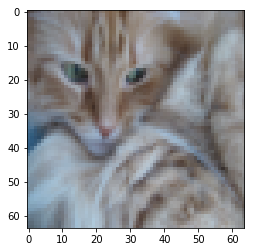

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Example of a cat picture
index = 2
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + \
       ", and therefore it's a '" + \
       classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + \
       "' picture.")

>**NOTE:** The `np.squeeze()` method extracts the " inner dimension" of the array, for example:

In [7]:
train_set_y[:, index]

array([1])

In [8]:
np.squeeze(train_set_y[:, index])

array(1)

>**Note:** The "[ ]" has been removed.

### Data Preprocessing
The final model analysis (see **Analysis** Notebook)is expecting a *training* set and a *test* set represented by a numpy array of shape (no. pixels $\times$ no. pixels $\times$ depth, data set size) respectively. In turn, the model is expecting the training set and test set labels represented as a numpy array (vector) of shape (1, data set size) respectively.

>**Note:** It is not determined as yet wether the "vectorization" of the images should be performed by the `TrainerLambda` to set up the inputs for *Layer 0*. For the sake of Version 1.0, the preprocessing of the input data will be performed by `launch.py` as various helper functions.

#### Vectorize
The images are represented by a 3D array of shape $(length, height, depth = 3)$. However, when an image is read as the input of an algorithm it is converted to a vector of shape $(length*height*3, 1)$. In other words, it is "unrolled", "flattened" or "reshaped" from a 3D array into a 1D vector as can be seen below.

<img src="images/vectorization.png" style="width:800px;height:500px;">
<caption><left>[*image source](https://www.deeplearning.ai)</left></caption><br>

The following cells explains of this process using the `train_set_x_orig` numpy array. The end result for the input to the model is a is a numpy array where where each column represents a flattened image in a matrix with all the input features (images) being a column, $209$ for the training set and $50$ for the test set respectively.

In [9]:
# Copy of origional training set
orig = train_set_x_orig
print("Original shape: " + str(orig.shape))

# "vectorize" or flatten out the array into an 1D vector
flatten = orig.reshape(orig.shape[0], -1)
print("Flattened shape: "+ str(flatten.shape))

# Transpose into a colums
flatten_T = flatten.T
print("Transpose: " + str(flatten_T.shape))

Original shape: (209, 64, 64, 3)
Flattened shape: (209, 12288)
Transpose: (12288, 209)


>**Note:** For further intuition of what the above code is doing, the following shows a more "manual", alternate way.

#### Standardize
To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from $0$ to $255$. One common preprocessing step in machine learning is to subtract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by $255$ (the maximum value of a pixel channel). 

>**Note:** During the training of the model, the weights are multiplied and biases added to the initial inputs in order to observe neuron activations. Then it will backward propagate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. 

In [10]:
# Load datsets for preprocessing after vectorization
train_set_x = (train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T) / 255
test_set_x = (test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T) / 255
print("train_set_x shape: " + str(train_set_x.shape))
print("sample value: " + str(train_set_x[index][index]))

train_set_x shape: (12288, 209)
sample value: 0.266666666667


---
## Model-Parallel Neural Network Implementation
To implement the Neural Network using the **SNN** framework and the above Network configuration, the workflow is comprised of five key steps:  
1. Network Initialization.
2. Forward Propagation.
3. Calculate the Loss (Cost Function).
4. Backward Propagation.
5. Parameter Optimization (Gradient Descent).

The outcome of the above stages provides the optimal model parameters, for use in final prediction, as can be seen in the process diagram below.  

<img src="images/final_outline.png" style="width:800px;height:500px;">
<caption><left>[*image source](https://www.deeplearning.ai)</left></caption><br>

The next sections will further describe each phase in more detail.

### Network Initialization
#### Weight and Bias Initialization
For an **L-Layer** network, the *Weights* and *Bias* must be initialized for each individual layer, therefore the dimensions for these matrices must match to the dimensions of each layer. For example, if $n^{[l]}$ is the number of hidden units (neurons) in layer $l$ and the size of the input $X$ is $(12288, 209)$, for $m = 209$ training examples, then:


|               	|      **Shape of W**      	|  **Shape of b**  	|                 **Activation**                	| **Shape of Activation** 	|
|---------------	|:------------------------:	|:----------------:	|:---------------------------------------------:	|:-----------------------:	|
| **Layer 1**   	| $(n^{[1]},12288)$        	| $(n^{[1]},1)$    	| $Z^{[1]} = W^{[1]},X + b^{[1]}$               	| $(n^{[1]},209)$         	|
| **Layer 2**   	| $(n^{[2]}, n^{[1]})$     	| $(n^{[2]},1)$    	| $Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$         	| $(n^{[2]}, 209)$        	|
| $\vdots$      	| $\vdots$                 	| $\vdots$         	| $\vdots$                                      	| $\vdots$                	|
| **Layer L-1** 	| $(n^{[L-1]}, n^{[L-2]})$ 	| $(n^{[L-1]}, 1)$ 	| $Z^{[L-1]} =,W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ 	| $(n^{[L-1]}, 209)$      	|
| **Layer L**   	| $(n^{[L]}, n^{[L-1]})$   	| $(n^{[L]}, 1)$   	| $Z^{[L]} =,W^{[L]} A^{[L-1]} + b^{[L]}$       	| $(n^{[L]}, 209)$        	|



When we compute $W X + b$ in python, it carries out broadcasting. For example, if:  

$$
W = \begin{bmatrix}
j  & k  & l \\\
m  & n & o  \\\
p  & q & r
\end{bmatrix}
\space
\space
X = \begin{bmatrix}
a  & b  & c \\\
d  & e & f \\\
g  & h & i 
\end{bmatrix}
\space
\space
b =\begin{bmatrix}
s  \\\
t  \\\
u
\end{bmatrix}$$

Then $WX + b$ will be:

$$
WX + b = \begin{bmatrix}
(ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\\
(ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\\
(pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}$$

To start the initialization process, the *Weights* are initialized randomly using a "standard" normal distribution with a mean of $0$ and a standard deviation of $1$. To further constrain the weights to be close to zero **but** not exactly zero (for *symmetry breaking*), each random weight is multiplied by $0.01$. The *Bias* is initialized to zero but also multiplied by $0.01$.

The *Weights* and *Bias* are further optmimized using [ReLU](http://www.cv-foundation.org/openaccess/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf) initialization. This means that for all layers that use the **ReLU** activation function, the *Weights* are initialized using the following formula:
$$\sqrt \frac{2}{n}$$
Where $n$ is the number of Neurons (hidden units) for the Layer.

#### Mini-Batch Initialization
To build mini-batches from the Training Set, the following two steps are applied:
- **Shuffle:**  
    Create a shuffled version of the training set (X, Y) as shown below. Each column of X and Y represents a training example. Note that the random shuffling is done synchronously between X and Y. Such that after the shuffling the $i^{th}$ column of X is the example corresponding to the $i^{th}$ label in Y. The shuffling step ensures that examples will be split randomly into different mini-batches.

<img src="images/kiank_shuffle.png" style="width:800px;height:500px;">
<caption><left>[*image source](https://www.deeplearning.ai)</left></caption><br>

- **Partition:**  
    Partition the shuffled (X, Y) into mini-batches of size `batch_size` (**64** from `parameters.json`). The number of training examples is **not** always divisible by `batch_size`, therefore last mini batch might be smaller. When the final mini-batch is smaller than the full `batch_size`, it will look like this:

<img src="images/kiank_partition.png" style="width:800px;height:500px;">
<caption><left>[*image source](https://www.deeplearning.ai)</left></caption><br>

>**Note:** The last mini-batch might end up smaller than mini_batch_size=64. Let $\lfloor s \rfloor$ represents $s$ rounded down to the nearest integer, using the `math.floor(s)` function in Python. If the total number of examples is not a multiple of 64 then there will be:  
$$\lfloor \frac{m}{mini\_batch\_size}\rfloor$$ mini-batches with a full 64 examples, and the number of examples in the final mini-batch will be:  
$$m-mini_\_batch_\_size \times \lfloor \frac{m}{mini\_batch\_size}\rfloor$$

### Forward Propagation
The *Forward Propagation* step of the process is comprised of two separate pieces, the **Linear** activation and the **Non-Linear** activation to constrain the outputs between $0$ and $1$.  

#### Linear Activation
The *Linear* part of the activation computes the following equation:  
$$Z^{[l]} = W^{[l]} \cdot A^{[l]} + b^{[l]}$$

>**Note:** It is important to cache the Linear Activations ($Z$) for later use in he Backward Propagation process.

Where $A^{[0]} = X$

#### Non-Linear Activation
The **L-Layer** Neural Network implements two differnt non-linear activation functions:  

- **Rectified Linear Unit (ReLU):** The mathematical formula for the *ReLU* function is $A = ReLU(Z) = max(0, Z)$.  
- **Sigmoid:** The methematical formula for the *Sigmoid* function is $\sigma(Z) = \sigma(W\cdot A+b) = \frac{1}{1 + e^{(-z)}}$.  

### Loss
**Cross Entropy** is commonly-used in binary classification (labels are assumed to take values $0$ or $1$) as a loss function which is computed by:

$$\mathcal{L} = -\frac{1}{m} \sum\limits_{i = 1}^{m} \big[y^{(i)}\cdot\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\cdot\log\left(1-a^{[L](i)}\right)\big]$$

Where $a^{[L](i)}$ is the last layer of the network and is synonymous with $\hat{y}$.

Cross entropy measures the divergence between two probability distribution, if the cross entropy is large, which means that the difference between two distribution is large, while if the cross entropy is small, which means that two distribution is similar to each other. Generally, comparing to quadratic cost function, cross entropy cost function has the advantages that fast convergence and is more likely to reach the global optimization. For the mathematical details, see [wikipedia](https://en.wikipedia.org/wiki/Cross_entropy).

### Backward Propagation
*Backward Propagation* is used to calculate the the gradient of the *Loss* function with respect to the various paramaters, as follows:

<img src="images/backprop_kiank.png" style="width:800px;height:500px;">
<caption><left>[*image source](https://www.deeplearning.ai)</left></caption><br>

#### Non-Linear Derivative
As with *Forward Propagation*, there are two derivative non-linear activation functions for *Sigmoid* and *ReLU* respectively. If $g(\cdot)$ is the activations function, then the derivative of *Sigmoid* and *ReLU* compute:
$$dZ^{[l]} = \frac{\partial\mathcal{L}}{\partial Z^{[l]}} = dA^{[l]} \cdot g^{'}(Z^{[l]})$$

#### Linear Derivative
Once the derivative of the non-linear activation is computed, the derivatives of $W^{[l]}$, $b^{[l]}$ and $A^{[l]}$, are computed using the input $dZ^{[l]}$, to get , $dW^{[l]}$, $db^{[l]}$, $dA^{[l-1]}$ as follows:

$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T}$$  
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$  
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]}$$  

### Parameter Update using Smallest Error Mini-batch Gradient Descent
The Model parameters ($W^{[l]}$ and $b^{[l]}$) are updated using **Gradient Descent** using the following formula:  

$$W^{[l]} = W^{[l]} - \alpha\cdot dW^{[l]}$$  
$$b^{[l]} = b^{[l]} - \alpha\cdot db^{[l]}$$  

Where $l$ is the *layer* and $\alpha$ is the *Learning Rate*.

### Prediction
After the fitted parameters are updated using the *Smallest Error Mini-batch Gradient Descent*, the paramaters can be used to predict wether a new image can classified as a **cat** or **non-cat** image. For further information on how the accuracy of the trained model fairs against testing data or unseen data, see the **Analysis** Notebook.

---
## Next: Code Overview
Now that the **Serverless Neural Network** has beenn introduced, it's time to review the Python code that makes up the various Lambda Functions in the [**Codebook**](./Codebook.ipynb).